In [1]:
import numpy as np
import seaborn as sb
from itertools import product
from matplotlib import animation
from matplotlib import pyplot as plt
from IPython.display import HTML


In [2]:
input_day11_test = ""
with open("input-day11-test") as f:
    input_day11_test = np.array([[int(y) for y in x] for x in f.read().strip().split("\n")])

input_day11 = ""
with open("input-day11") as f:
    input_day11 = np.array([[int(y) for y in x] for x in f.read().strip().split("\n")])

In [3]:
input_day11_test

array([[5, 4, 8, 3, 1, 4, 3, 2, 2, 3],
       [2, 7, 4, 5, 8, 5, 4, 7, 1, 1],
       [5, 2, 6, 4, 5, 5, 6, 1, 7, 3],
       [6, 1, 4, 1, 3, 3, 6, 1, 4, 6],
       [6, 3, 5, 7, 3, 8, 5, 4, 7, 8],
       [4, 1, 6, 7, 5, 2, 4, 6, 4, 5],
       [2, 1, 7, 6, 8, 4, 1, 7, 2, 1],
       [6, 8, 8, 2, 8, 8, 1, 1, 3, 4],
       [4, 8, 4, 6, 8, 4, 8, 5, 5, 4],
       [5, 2, 8, 3, 7, 5, 1, 5, 2, 6]])

<AxesSubplot:>

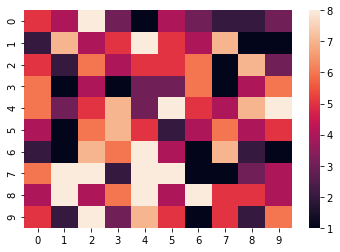

In [4]:
sb.heatmap(input_day11_test)

In [5]:
input_day11

array([[4, 5, 7, 5, 3, 5, 5, 6, 2, 3],
       [3, 3, 2, 5, 5, 7, 8, 4, 2, 6],
       [7, 8, 8, 5, 1, 6, 5, 5, 7, 6],
       [4, 8, 7, 1, 4, 5, 5, 6, 5, 8],
       [3, 7, 2, 2, 5, 4, 5, 3, 1, 2],
       [8, 3, 6, 2, 6, 6, 3, 8, 3, 2],
       [5, 5, 6, 2, 7, 4, 3, 3, 2, 4],
       [4, 1, 6, 5, 7, 7, 6, 4, 1, 2],
       [1, 8, 1, 7, 8, 1, 3, 6, 7, 5],
       [4, 2, 5, 5, 5, 2, 4, 6, 3, 2]])

<AxesSubplot:>

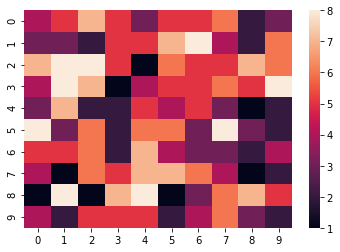

In [6]:
sb.heatmap(input_day11)

In [7]:
len(list(product((-1, 0, 1), (-1, 0, 1))))

9

In [8]:
class OctoSwarm:
       
    __slots__ = ['octos', 'steps_run', 'total_flashes', 'frames', 'steps_all_flash', 'frames_steps']
    
    def __init__(self, octo_data):
        self.octos = np.copy(octo_data)
        self.steps_run = 0
        self.total_flashes = 0
        self.frames = [np.copy(self.octos)]
        self.frames_steps = [np.copy(self.octos)]
        self.steps_all_flash = []
        
    def flash(self, x, y, blacklist):
        # should never happen
        assert self.octos[y][x] > 9
        assert (x, y) not in blacklist
        self.octos[y][x] = 0
        # increase the energy level of all adjacent octopuses by 1
        for dx, dy in product((-1, 0, 1), (-1, 0, 1)):
            nx = x + dx
            ny = y + dy
            if nx < 0 or ny < 0 or nx > 9 or ny > 9 or (nx, ny) in blacklist:
                continue
            if dx or dy:
                self.octos[ny][nx] += 1
                
    def next_step(self):
        self.steps_run += 1
        self.octos += 1
        flashed = set()
        while True:
            to_be_flashed = sorted([(x, y) for (y, x) in list(zip(*np.where(self.octos > 9))) if (x, y) not in flashed])
            if not to_be_flashed: 
                break
            for (x, y) in to_be_flashed:
                self.flash(x=x, y=y, blacklist=flashed)
                flashed.add((x, y))
            self.frames.append(np.copy(self.octos))
        self.total_flashes += len(flashed)
        if len(flashed) == self.octos.size:
            self.steps_all_flash.append(self.steps_run)
        self.frames_steps.append(np.copy(self.octos))
        
    def run_steps(self, step_count):
        while self.steps_run < step_count:
            self.next_step()    
        return self.total_flashes
    
    def run_until_all_flash(self):
        while not self.steps_all_flash:
            self.next_step()    
        return self.total_flashes
    
    def animate(self, i):
        return sb.heatmap(self.frames[i], vmax=10, cbar=False)
    
    def animate_steps(self, i):
        return sb.heatmap(self.frames_steps[i], vmax=10, cbar=False)


Part 1: 1642


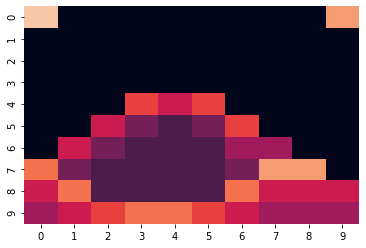

In [9]:
octo_swarm1 = OctoSwarm(input_day11)
print("Part 1:", octo_swarm1.run_steps(100))

anim1 = animation.FuncAnimation(
    plt.figure(), 
    octo_swarm1.animate, 
    frames=len(octo_swarm1.frames),
    repeat=False,
    interval=20)

HTML(anim1.to_html5_video())

Part 2: [320]


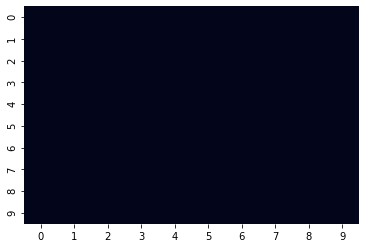

In [10]:
octo_swarm2 = OctoSwarm(input_day11)
octo_swarm2.run_until_all_flash()
print("Part 2:", octo_swarm2.steps_all_flash)

anim2 = animation.FuncAnimation(
    plt.figure(), 
    octo_swarm2.animate_steps, 
    frames=len(octo_swarm2.frames_steps),
    repeat=False,
    interval=100)

HTML(anim2.to_html5_video())